In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [5]:
dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


In [6]:
dataset=dataset.astype(int)

In [7]:
dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [8]:
dataset.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Genre_Male'],
      dtype='object')

In [9]:
X = dataset.iloc[:, 3:5].values

In [10]:
X

array([[39,  1],
       [81,  1],
       [ 6,  0],
       [77,  0],
       [40,  0],
       [76,  0],
       [ 6,  0],
       [94,  0],
       [ 3,  1],
       [72,  0],
       [14,  1],
       [99,  0],
       [15,  0],
       [77,  0],
       [13,  1],
       [79,  1],
       [35,  0],
       [66,  1],
       [29,  1],
       [98,  0],
       [35,  1],
       [73,  1],
       [ 5,  0],
       [73,  1],
       [14,  0],
       [82,  1],
       [32,  0],
       [61,  1],
       [31,  0],
       [87,  0],
       [ 4,  1],
       [73,  0],
       [ 4,  1],
       [92,  1],
       [14,  0],
       [81,  0],
       [17,  0],
       [73,  0],
       [26,  0],
       [75,  0],
       [35,  0],
       [92,  1],
       [36,  1],
       [61,  0],
       [28,  0],
       [65,  0],
       [55,  0],
       [47,  0],
       [42,  0],
       [42,  0],
       [52,  0],
       [60,  1],
       [54,  0],
       [60,  1],
       [45,  0],
       [41,  1],
       [50,  0],
       [46,  1],
       [51,  0

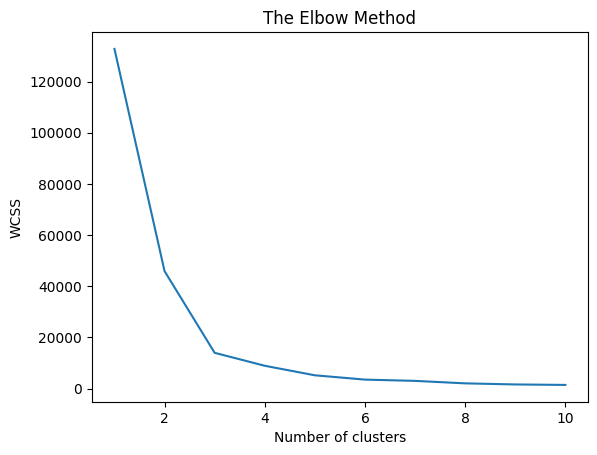

In [11]:
from sklearn.cluster import KMeans
list1 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    list1.append(kmeans.inertia_)
plt.plot(range(1, 11), list1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
list1

[132753.28,
 45905.013058001816,
 13978.407788699462,
 8915.835768282497,
 5192.791390382317,
 3508.0530555972764,
 3010.624100440763,
 2043.8120801112032,
 1614.6065672250447,
 1430.34328808269]

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [14]:
y_kmeans

array([2, 4, 3, 4, 2, 4, 3, 1, 3, 4, 3, 1, 3, 4, 3, 4, 2, 4, 2, 1, 2, 4,
       3, 4, 3, 4, 2, 0, 2, 1, 3, 4, 3, 1, 3, 4, 3, 4, 2, 4, 2, 1, 2, 0,
       2, 4, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 4, 2, 1, 3, 4, 3, 4,
       2, 4, 3, 1, 3, 4, 3, 4, 3, 1, 2, 1, 3, 1, 2, 4, 3, 1, 3, 1, 3, 4,
       3, 1, 3, 4, 3, 4, 2, 1, 3, 1, 2, 4, 3, 1, 2, 0, 3, 4, 3, 1, 3, 1,
       3, 4, 3, 1, 2, 1, 3, 1, 2, 1, 3, 4, 3, 1, 3, 4, 3, 1, 3, 4, 2, 4,
       3, 1])

In [15]:
supervised=dataset

In [16]:
supervised

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [17]:
supervised['Cluster_group']=y_kmeans

In [18]:
supervised

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,Cluster_group
0,1,19,15,39,1,2
1,2,21,15,81,1,4
2,3,20,16,6,0,3
3,4,23,16,77,0,4
4,5,31,17,40,0,2
...,...,...,...,...,...,...
195,196,35,120,79,0,4
196,197,45,126,28,0,2
197,198,32,126,74,1,4
198,199,32,137,18,1,3


In [19]:
supervised.to_csv("cluster.csv",index=False)

In [20]:
dir(kmeans)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_algorithm',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params_vs_input',
 '_check_test_data',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_features_out',
 '_n_init',
 '_n_threads',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_ht

In [21]:
centroids=kmeans.cluster_centers_

In [22]:
centroids

array([[52.79032258,  0.46774194],
       [90.7037037 ,  0.44444444],
       [37.        ,  0.3       ],
       [11.84615385,  0.56410256],
       [74.25      ,  0.40625   ]])

In [23]:
y_kmeans

array([2, 4, 3, 4, 2, 4, 3, 1, 3, 4, 3, 1, 3, 4, 3, 4, 2, 4, 2, 1, 2, 4,
       3, 4, 3, 4, 2, 0, 2, 1, 3, 4, 3, 1, 3, 4, 3, 4, 2, 4, 2, 1, 2, 0,
       2, 4, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 4, 2, 1, 3, 4, 3, 4,
       2, 4, 3, 1, 3, 4, 3, 4, 3, 1, 2, 1, 3, 1, 2, 4, 3, 1, 3, 1, 3, 4,
       3, 1, 3, 4, 3, 4, 2, 1, 3, 1, 2, 4, 3, 1, 2, 0, 3, 4, 3, 1, 3, 1,
       3, 4, 3, 1, 2, 1, 3, 1, 2, 1, 3, 4, 3, 1, 3, 4, 3, 1, 3, 4, 2, 4,
       3, 1])

In [24]:
supervised.columns[3]

'Spending Score (1-100)'

In [25]:
supervised.columns[2]

'Annual Income (k$)'

In [26]:
supervised.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Genre_Male', 'Cluster_group'],
      dtype='object')

In [27]:
!pip install seaborn

C:\Users\sreet\anaconda3\envs\aidl\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


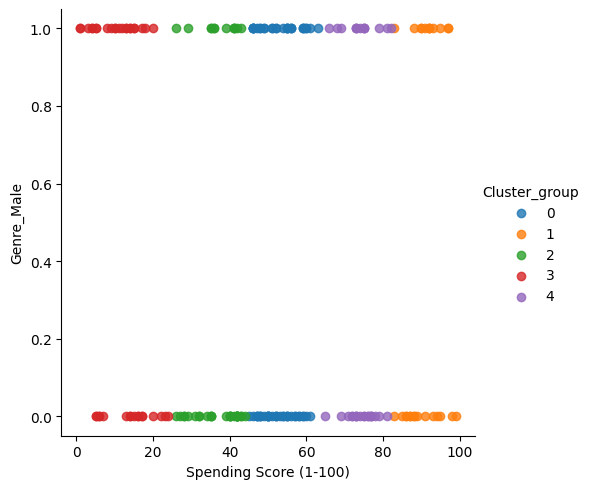

In [28]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False,legend_out=True)

C:\Users\sreet\anaconda3\envs\aidl\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


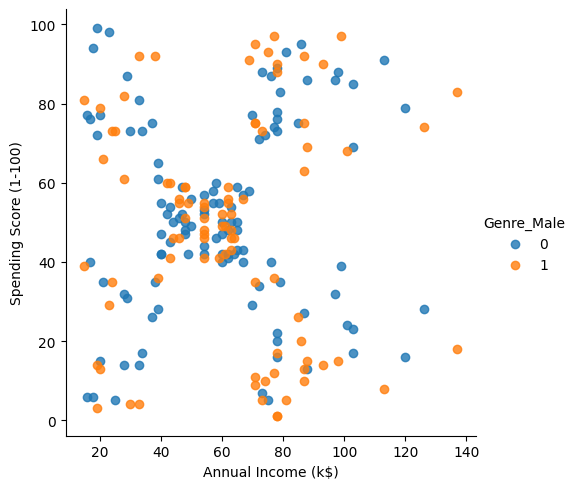

In [30]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[2], y=supervised.columns[3], hue=supervised.columns[4],
                   fit_reg=False,legend_out=True)

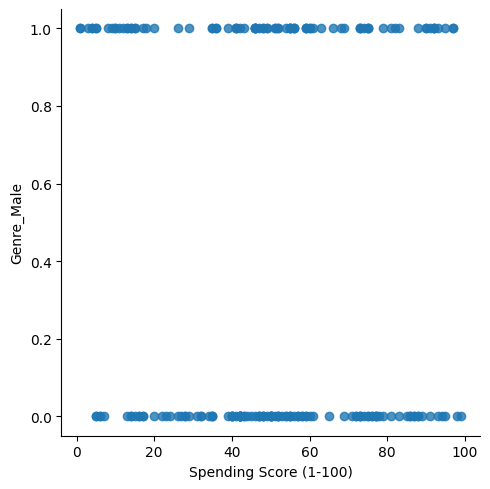

In [31]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4],
                   fit_reg=False)